### Proyecto de álgebra 

### Primera parte: construir un identificador de rostros 


La
matriz data.npy contiene 72 imagenes de rostros, correspondientes a 12 mujeres.
Puede cargar la matriz y mostrar las imagenes usando el siguiente c´odigo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''Para la descomposicion SVD de una matriz 
donde U contiene los k primeros vectores singulares izquierdos (como columnas), S es un vector que contiene los primeros k valores singulares, y
V h contiene los primeros k vectores singulares derechos (como filas).

'''
def truncated_svd(A, k):
  U, S, Vh = np.linalg.svd(A, full_matrices=False)
  return U[:, :k], S[:k], Vh[:k]

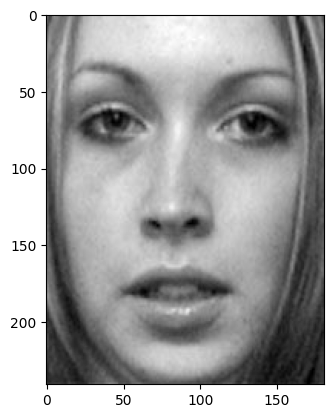

'las filas 1 a 6, las correspondientes a la segunda\npersona en las filas 7 a 12, y asi\n'

In [10]:
# Cargar matriz
A = np.load("data.npy")
# Mostrar la i-esima imagen
i = 2 # Cambiar si se quiere mostrar otra imagen
imagen = A[i].reshape((241, 181))
plt.imshow(imagen, cmap="gray")
plt.show()
'''las filas 1 a 6, las correspondientes a la segunda
persona en las filas 7 a 12, y asi
'''

''' Realice la SVD de la matriz A, y ´usela para proyectar las imagenes sobre
el espacio lineal de dimensi´on k que mejor las aproxima. Use valores de
k = 1, 5, 10, 25, 50 y 72. Elija un par de rostros, y para cada valor de k,
muestre los “rostros aproximados”(correspondientes a las proyecciones) y
comp´arelos con los originales ''' 

In [12]:
VALORES_K = [1, 5, 10, 25, 50, 72]
aproximaciones = {}

for i in VALORES_K:
    U_k, S_k, Vh_k = truncated_svd(A, i)
    aproximaciones[f"A_{i}"] = U_k @ np.diag(S_k) @ Vh_k


El codigo genera matrices aproximadas, donde 
- A_1: Aproximación con 1 valor singular.
- A_2 ... 
....
..

- A_72: reconstrucción completa, que da igual a A, porque se usan todos los vectores y valores singulares disponibles, por ende no hay pérdida de     información. 

SVD, no es una compresión con pérdida cuando k = r (con r rango de la matriz). 


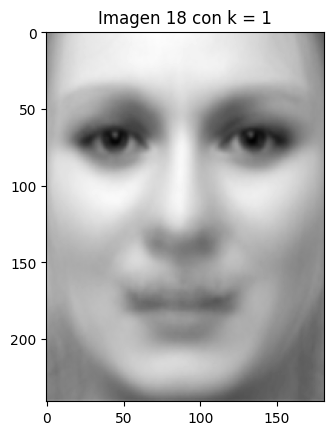

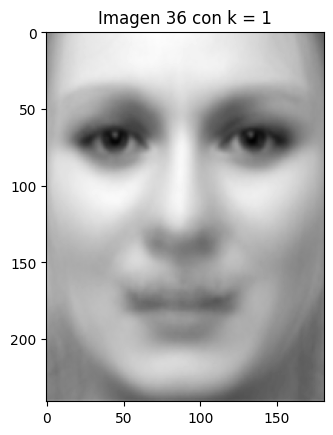

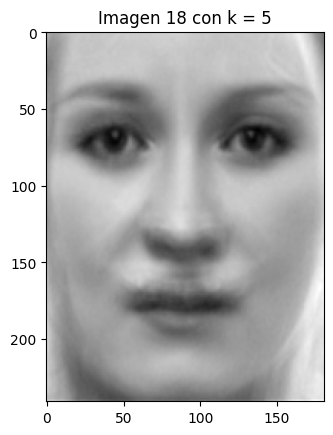

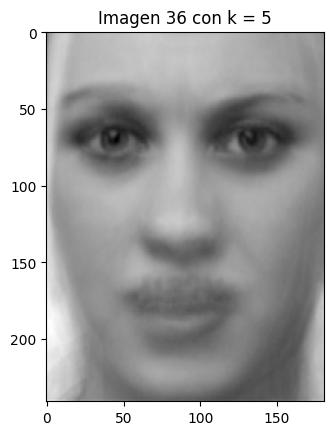

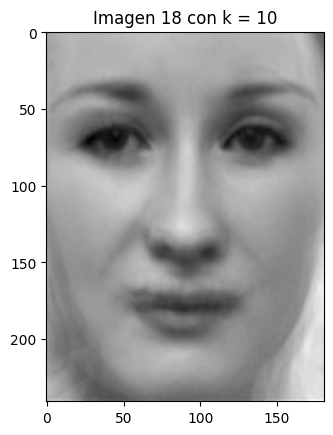

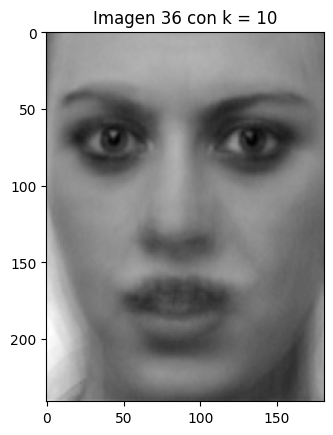

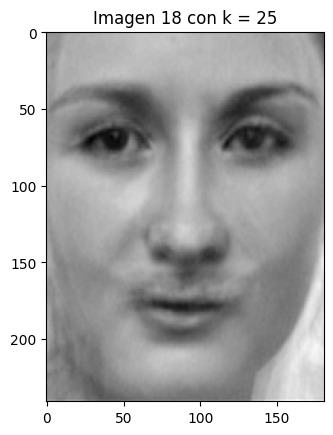

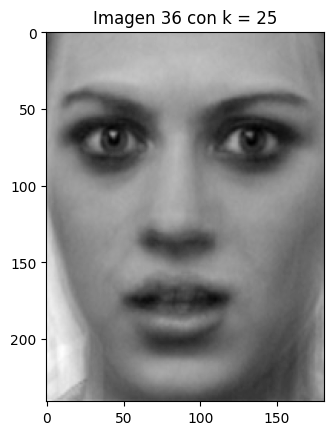

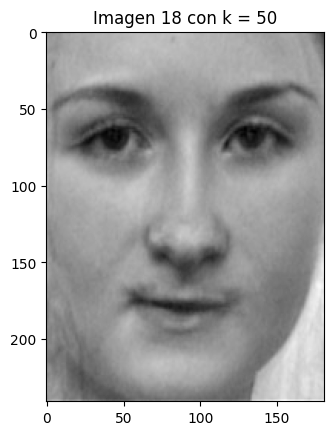

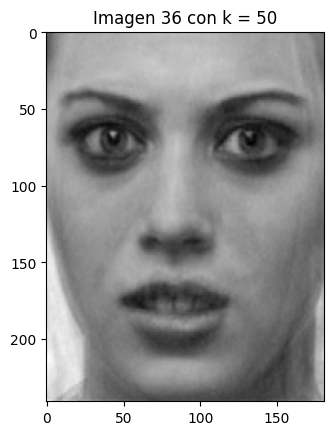

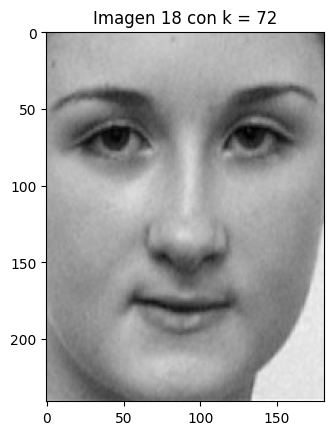

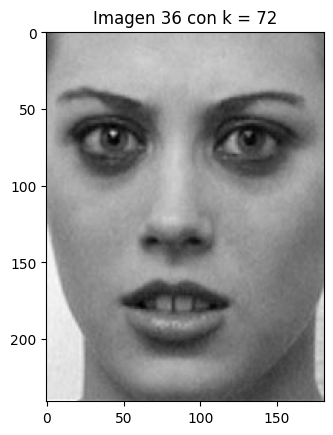

In [13]:
for i in aproximaciones.keys(): ##recorre las claves A_1,....A_72 que almacena cada matriz aproximada
  for j in [18, 36]: ## imágenes desde 18 a 36
    plt.imshow(aproximaciones[i][j].reshape(241, 181), cmap="gray") ##IMG de 2D a 3D
    plt.title(f"Imagen {j} con k = {i.split('_')[1]}")
    plt.show()